/var/folders/94/8b3jmj1x6tbdx6dh5b9pb_9c0000gn/T/ipykernel_27379/57136536.py:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. Open Plan users should migrate now.  All other users should review the migration guide (https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp)to learn when to migrate.
  service = QiskitRuntimeService()


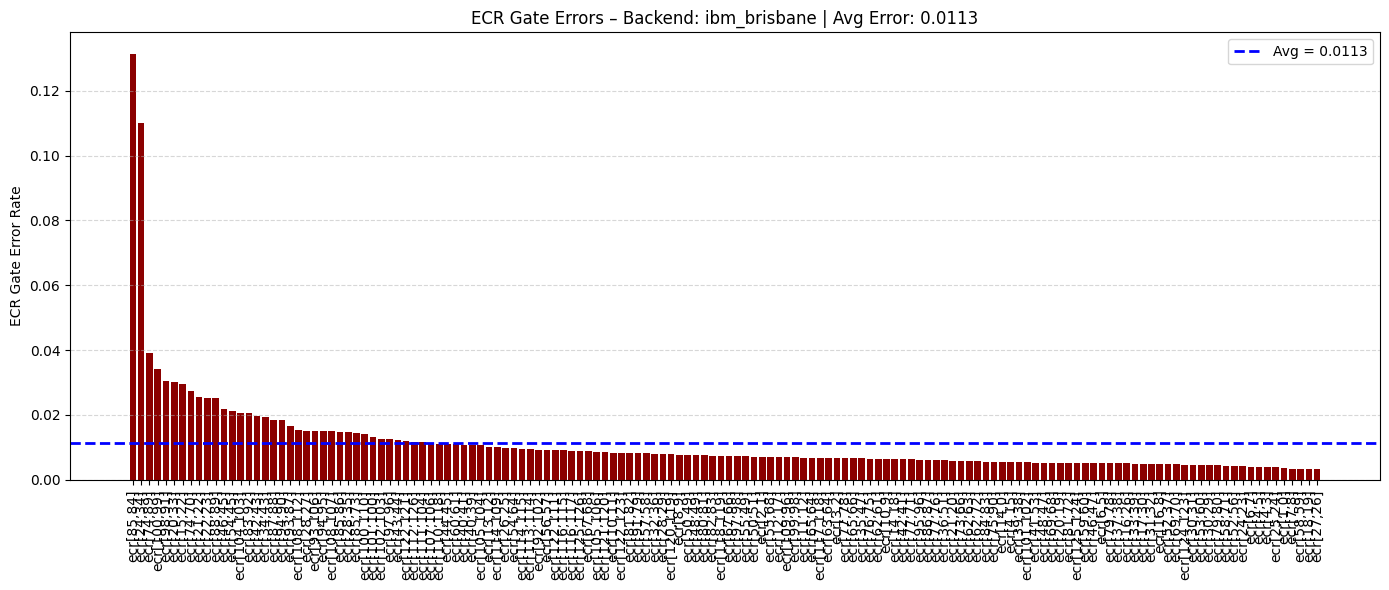

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
import matplotlib.pyplot as plt

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")  
props = backend.properties()

ecr_labels = []
ecr_errors = []

for gate in props.gates:
    if gate.gate == 'ecr':
        for param in gate.parameters:
            if param.name == 'gate_error':
                label = f"ecr[{gate.qubits[0]},{gate.qubits[1]}]"
                ecr_labels.append(label)
                ecr_errors.append(param.value)

sorted_ecr = sorted(zip(ecr_errors, ecr_labels), reverse=True)
ecr_errors, ecr_labels = zip(*sorted_ecr)

avg_error = sum(ecr_errors) / len(ecr_errors)

plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(ecr_labels)), ecr_errors, color='darkred')
plt.axhline(avg_error, color='blue', linestyle='--', linewidth=2, label=f'Avg = {avg_error:.4f}')
    
plt.xticks(range(len(ecr_labels)), ecr_labels, rotation=90)
plt.ylabel("ECR Gate Error Rate")
plt.title(f"ECR Gate Errors – Backend: {backend.name} | Avg Error: {avg_error:.4f}")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()